In [8]:
import pandas as pd

In [9]:
from matplotlib import pyplot as plt

In [10]:
import seaborn as sns

In [11]:
import numpy as np

In [12]:
import datetime as dt

In [13]:
from datetime import timedelta

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.svm import SVR

In [16]:
from statsmodels.tsa.api import Holt

In [17]:
covid = pd.read_csv("/Users/fahmidaliza/Desktop/covid_19_data.csv")

In [18]:
covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [19]:
print("Size/Shape of the dataset",covid.shape)
print("checking for null values",covid.isnull().sum())
print("checking Data-type", covid.dtypes)


Size/Shape of the dataset (18327, 8)
checking for null values SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
checking Data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [20]:
# Dropping the column
covid.drop(["SNo"],1,inplace=True)

In [21]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [22]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [23]:
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
18322   2020-04-24
18323   2020-04-24
18324   2020-04-24
18325   2020-04-24
18326   2020-04-24
Name: ObservationDate, Length: 18327, dtype: datetime64[ns]

In [24]:
#Grouping different types of cases as per the day
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [25]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Deaths cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Basic Information
Total number of Confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Deaths cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

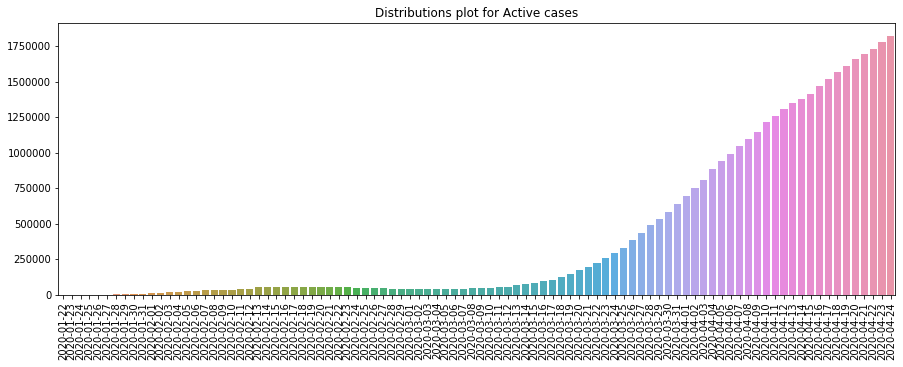

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

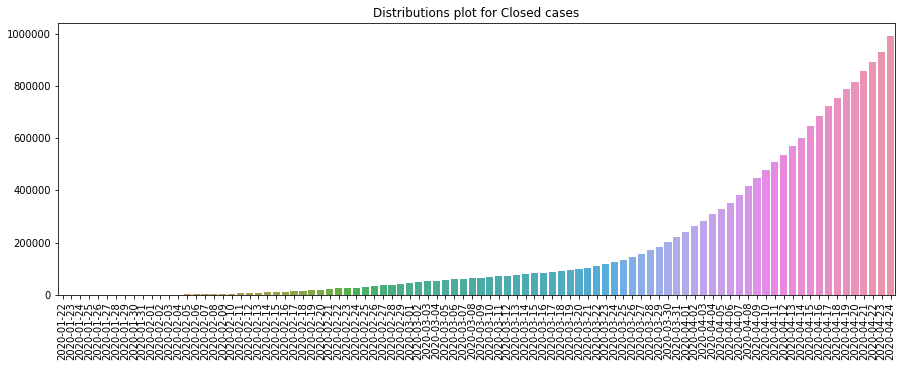

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distributions plot for Closed cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'weekly progress of different types of cases')

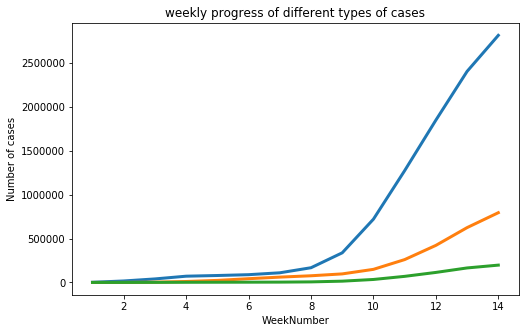

In [55]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
        weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
        weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
        weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])   
        week_num.append(w)
        w = w+1
plt.figure(figsize=(8,5))      
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("weekly progress of different types of cases")

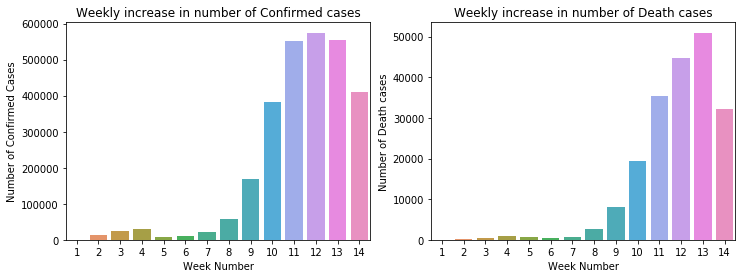

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num, y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num, y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death cases")
plt.show()

Average increase in number of Confirmed cases everday: 29900.0
Average increase in number of Deaths cases everday: 2097.0
Average increase in number of Recovered cases everday: 8442.0


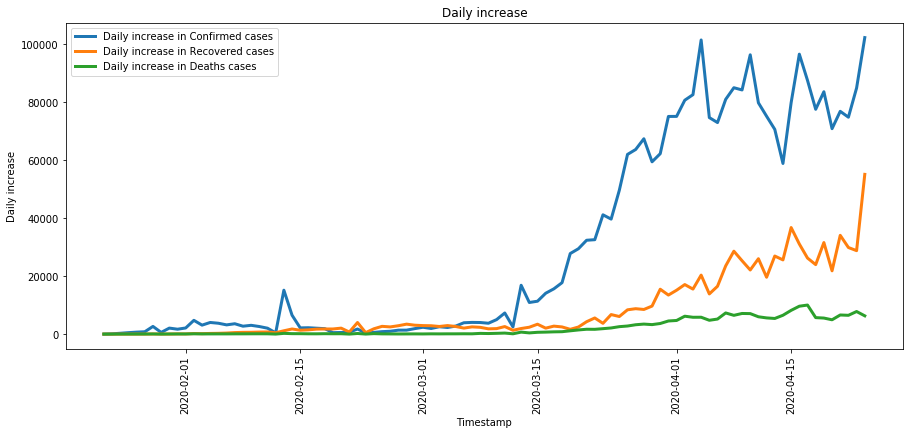

In [30]:
print("Average increase in number of Confirmed cases everday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
plt.figure(figsize=(15,6)) 
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in Confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Deaths cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [31]:
#Country wise analysis
#Calculating country wise Mortality rate
countrywise = covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending="False")
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100


Text(0.5, 1.0, 'Top 15 conutries as per number of Deaths')

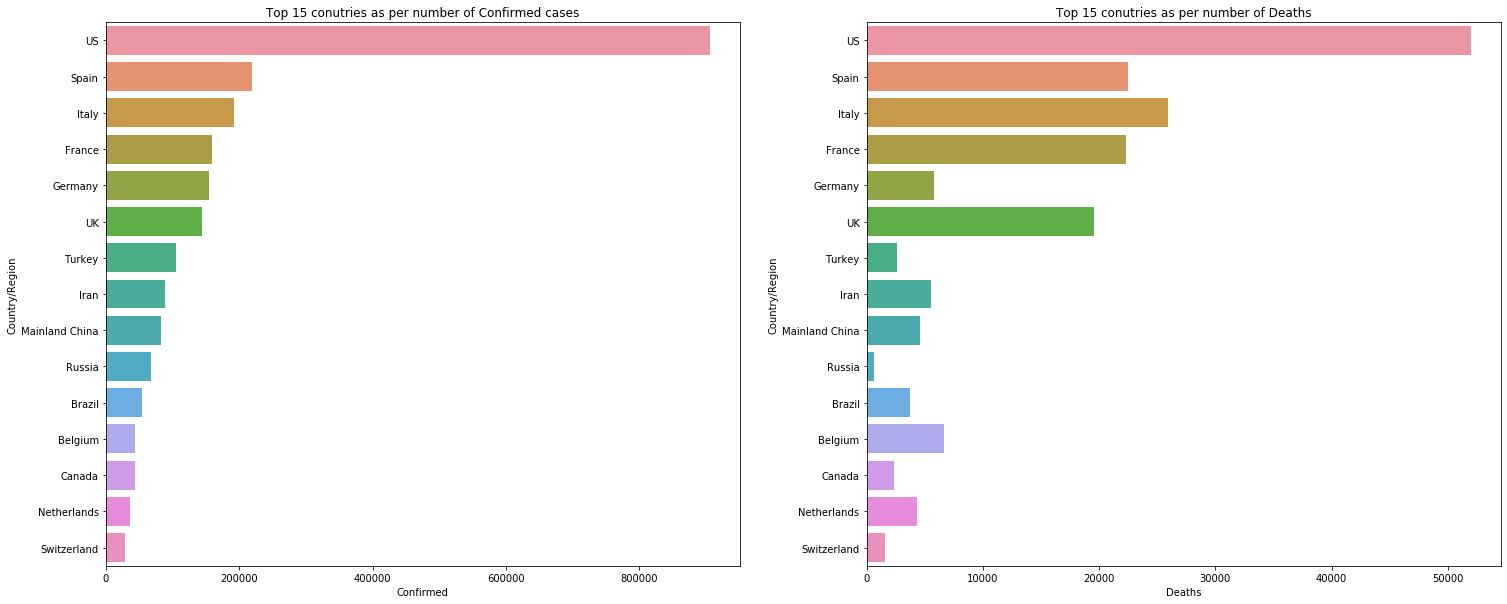

In [54]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 conutries as per number of Confirmed cases")
sns.barplot(x=top_15confirmed["Deaths"],y=top_15confirmed.index,ax=ax2)
ax2.set_title("Top 15 conutries as per number of Deaths")


In [33]:
#Data anaylsis for india
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active cases",datewise_india["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total Closed cases",(datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1]))

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active cases -966230.0
Total Closed cases 6278.0


In [34]:
#Data anaylsis for india
bangladesh_data = covid[covid["Country/Region"]=="Bangladesh"]
datewise_bangladesh = bangladesh_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_bangladesh.iloc[-1])
print("Total Active cases",datewise_bangladesh["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total Closed cases",(datewise_bangladesh["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1]))

Confirmed    4689.0
Recovered     112.0
Deaths        131.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active cases -986071.0
Total Closed cases 892.0


In [35]:
#Data anaylsis for india
us_data = covid[covid["Country/Region"]=="US"]
datewise_us = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total Active cases",datewise_us["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total Closed cases",(datewise_us["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1]))

Confirmed    905333.0
Recovered     99079.0
Deaths        51949.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active cases -85427.0
Total Closed cases 99859.0


Text(0.5, 1.0, 'weekly progress of different types of cases')

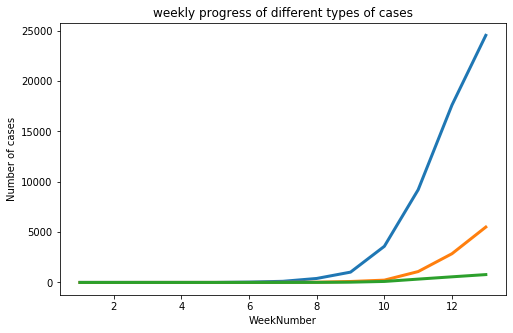

In [47]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
        india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
        india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
        india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])   
        week_num_india.append(w)
        w = w+1
plt.figure(figsize=(8,5))      
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("weekly progress of different types of cases")

In [53]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
Bangladesh_data = covid[covid["Country/Region"]=="Bangladesh"]
spain_data = covid[covid["Country/Region"]=="spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_us = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_bangladesh = bangladesh_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_spain = spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})  
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach max",max_ind,"Confirmed cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach max")
print("It took",datewise_us[(datewise_us["Confirmed"]>0)&(datewise_us["Confirmed"]<=max_ind)].shape[0],"days in US to reach max Confirmed cases")
print("It took",datewise_bangladesh[(datewise_bangladesh["Confirmed"]>0)&(datewise_bangladesh["Confirmed"]<=max_ind)].shape[0],"days in Bangladesh to reach max Confirmed cases")
print("It took",datewise_spain[(datewise_spain["Confirmed"]>0)&(datewise_spain["Confirmed"]<=max_ind)].shape[0],"days in spain to reach max Confirmed cases")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in china to reach max Confirmed cases")

It took 86 days in India to reach max 24530.0 Confirmed cases
It took 44 days in Italy to reach max
It took 59 days in US to reach max Confirmed cases
It took 48 days in Bangladesh to reach max Confirmed cases
It took 0 days in spain to reach max Confirmed cases
It took 14 days in china to reach max Confirmed cases


In [63]:
datewise["Days Since"]= datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]


In [70]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))



/Users/fahmidaliza/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [71]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))


In [85]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","LR","SVR"])
model_predictions.head(5)
    

,Dates,LR,SVR
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245


In [86]:
model_train = datewise.iloc[:int(datewise.shape[0])]
valid = datewise.iloc[int(datewise.shape[0]*0.85):]

In [87]:
holt = Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [98]:
holt_new_date=[]
holt_new_prediction = []
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
    
model_predictions["Holts linear model prediction"]= holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holt linear model prediction,Holt linear model prediction,Holts linear model prediction
0,2020-04-25,1560529,3322586,4183018,4183018,4183018
1,2020-04-26,1582219,3500761,4268303,4268303,4268303
2,2020-04-27,1603909,3686599,4353587,4353587,4353587
3,2020-04-28,1625599,3880344,4438871,4438871,4438871
4,2020-04-29,1647289,4082245,4524155,4524155,4524155
